In [28]:
import csv
import zipfile
import re
import pandas as pd
import numpy as np

**Feature Extraction**

In [ ]:
def extract_number_of_links(html_content):
    links = re.findall(r'<a[^>]*href=[^>]*>', html_content)
    return len(links)

def extract_number_of_domains(html_content):
    domains = re.findall(r'<a[^>]*href=["\'](http[s]?://([^/]+))["\'][^>]*>', html_content)
    distinct_domains = set(domains)
    return len(distinct_domains)

def extract_number_of_dots(html_content):
    dots_count = 0
    links = re.findall(r'<a[^>]*href=[^>]*>', html_content)
    for link in links:
        dots_count = max(dots_count, link.count('.'))
    return dots_count

def extract_contains_javascript(html_content):
    return 'script' in html_content.lower()

def extract_features_from_zip(zip_file_path):
    features = []
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for file_name in zip_ref.namelist():
            if file_name.endswith('.txt'):
                with zip_ref.open(file_name) as file:
                    html_content = file.read().decode('utf-8')  # Assuming text files are encoded in UTF-8
                    feature = [
                        extract_number_of_links(html_content),
                        extract_number_of_domains(html_content),
                        extract_number_of_dots(html_content),
                        extract_contains_javascript(html_content)
                    ]
                    features.append(feature)
    return features

def export_features_to_csv(features, csv_file_path):
    with open(csv_file_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['Number of Links', 'Number of Domains', 'Number of Dots', 'Contains JavaScript'])
        writer.writerows(features)

In [22]:
# Specify the path to the phishing zip files
phishing_zip_file_1 = 'phishing_txt_files.zip'
phishing_zip_file_2 = 'txt_files.zip'
benign_zip_file = 'benign_txt_files.zip'

# Extract features from the phishing zip files
phishing_features_1 = extract_features_from_zip(phishing_zip_file_1)
phishing_features_2 = extract_features_from_zip(phishing_zip_file_2)
benign_features = extract_features_from_zip(benign_zip_file)

# Specify the paths for exporting the features to CSV files
phishing_csv_file_1 = 'phishing_features_1.csv'
phishing_csv_file_2 = 'phishing_features_2.csv'
benign_csv_file = 'benign_features.csv'

# Export phishing features to separate CSV files
export_features_to_csv(phishing_features_1, phishing_csv_file_1)
export_features_to_csv(phishing_features_2, phishing_csv_file_2)

# Export benign features to a separate CSV file
export_features_to_csv(benign_features, benign_csv_file)

print("Phishing features 1 exported to CSV file:", phishing_csv_file_1)
print("Phishing features 2 exported to CSV file:", phishing_csv_file_2)
print("Benign features exported to CSV file:", benign_csv_file)

Phishing features 1 exported to CSV file: phishing_features_1.csv
Phishing features 2 exported to CSV file: phishing_features_2.csv
Benign features exported to CSV file: benign_features.csv


Labelling HAM/SPAM

In [23]:
# Specify the path to the benign features CSV file
benign_csv_file = 'benign_features.csv'

# Read the existing benign features from the CSV file
benign_features = []
with open(benign_csv_file, 'r') as csv_file:
    reader = csv.reader(csv_file)
    header = next(reader)
    for row in reader:
        benign_features.append(row)

# Add 'Label' column with 'HAM' value to benign features
benign_features_with_label = [['HAM'] + row for row in benign_features]

# Specify the path for the updated benign features CSV file
updated_benign_csv_file = 'benign_features_with_label.csv'

# Write the updated benign features to the CSV file
with open(updated_benign_csv_file, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['Label'] + header)
    writer.writerows(benign_features_with_label)

print("Benign features with 'Label' exported to CSV file:", updated_benign_csv_file)


Benign features with 'Label' exported to CSV file: benign_features_with_label.csv


In [24]:
# Specify the paths to the phishing CSV files
phishing_csv_file_1 = 'phishing_features_1.csv'
phishing_csv_file_2 = 'phishing_features_2.csv'

# Specify the path for the merged CSV file
merged_csv_file = 'phishing_features_with_label.csv'

# Read the content from phishing CSV file 1
phishing_features_1 = []
with open(phishing_csv_file_1, 'r') as csv_file:
    reader = csv.reader(csv_file)
    header = next(reader)
    phishing_features_1 = list(reader)

# Read the content from phishing CSV file 2
phishing_features_2 = []
with open(phishing_csv_file_2, 'r') as csv_file:
    reader = csv.reader(csv_file)
    header = next(reader)
    phishing_features_2 = list(reader)

# Merge the phishing features
merged_phishing_features = phishing_features_1 + phishing_features_2

# Add the 'Label' column with 'SPAM' value
merged_phishing_features_with_label = [['SPAM'] + row for row in merged_phishing_features]

# Write the merged phishing features with 'Label' to the merged CSV file
with open(merged_csv_file, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['Label'] + header)
    writer.writerows(merged_phishing_features_with_label)

print("Phishing features merged and exported to CSV file:", merged_csv_file)


Phishing features merged and exported to CSV file: phishing_features_with_label.csv


Merged Features

In [27]:
# Specify the paths to the benign features CSV file and phishing features CSV file
benign_csv_file = 'benign_features_with_label.csv'
phishing_csv_file = 'phishing_features_with_label.csv'

# Specify the path for the merged CSV file
merged_csv_file = 'merged_features.csv'

# Read the content from the benign CSV file into a DataFrame
benign_df = pd.read_csv(benign_csv_file)

# Read the content from the phishing CSV file into a DataFrame
phishing_df = pd.read_csv(phishing_csv_file)

# Merge the benign and phishing DataFrames randomly
merged_df = pd.concat([benign_df, phishing_df], ignore_index=True)
merged_df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Write the merged DataFrame to the merged CSV file
merged_df.to_csv(merged_csv_file, index=False)

print("Benign and phishing features merged randomly and exported to CSV file:", merged_csv_file)


Benign and phishing features merged randomly and exported to CSV file: merged_features.csv


**ML Modelling**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

In [32]:
# Load the merged dataset from the CSV file
dataset = pd.read_csv('merged_features.csv')

# Prepare the feature matrix and label vector
X = dataset.iloc[:, 1:].to_numpy()  # Extract feature columns as a NumPy array
y = dataset['Label'].to_numpy()  # Extract label column as a NumPy array

In [31]:
dataset.head()

,Label,Number of Links,Number of Domains,Number of Dots,Contains JavaScript
0,HAM,1,0,1,True
1,HAM,17,2,3,True
2,SPAM,0,0,0,False
3,HAM,1,1,1,True
4,SPAM,0,0,0,False


In [ ]:
# Initialize the classifiers and create a list of classifiers
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(C=10, random_state=42)
ripper = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
decision_table = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
knn = KNeighborsClassifier()
one_r = tree.DecisionTreeClassifier(criterion="entropy", max_depth=1)
alternating_decision_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
decision_stump = DecisionTreeClassifier(max_depth=1)
pruned_c45_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
hybrid_tree_with_nb_leaves = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
random_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=None)
ada_boosted_c45_tree = AdaBoostClassifier(estimator=pruned_c45_tree)
ada_boosted_decision_stump = AdaBoostClassifier(estimator=decision_stump)
voted_perceptron = Perceptron()
bayes_net = GaussianNB()
naive_bayes = GaussianNB()

# Initialize classifiers
classifiers = [
    ("Random Forest", random_forest),
    ("SVM", svm),
    ("RIPPER", ripper),
    ("Decision Table", decision_table),
    ("K-Nearest Neighbors", knn),
    ("1R", one_r),
    ("Alternating Decision Tree", alternating_decision_tree),
    ("Decision Stump", decision_stump),
    ("Pruned C4.5 Tree", pruned_c45_tree),
    ("Hybrid Tree with Naive Bayes Leaves", hybrid_tree_with_nb_leaves),
    ("Random Tree (1 random attribute/node)", random_tree),
    ("AdaBoosted C4.5 Tree", ada_boosted_c45_tree),
    ("AdaBoosted Decision Stump", ada_boosted_decision_stump),
    ("Voted Perceptron", voted_perceptron),
    ("Bayes Net", bayes_net),
    ("Naive Bayes", naive_bayes)
]


In [ ]:
# Perform 10-fold cross-validation for each classifier and evaluate their performance
for classifier_name, classifier in classifiers:
    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    fp_values = np.zeros(10)  # Initialize the array with zeros
    fn_values = np.zeros(10)  # Initialize the array with zeros

    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        fp_values[i] = np.sum((y_pred == 1) & (y_test == 0))
        fn_values[i] = np.sum((y_pred == 0) & (y_test == 1))

    fp = np.mean(fp_values)
    fn = np.mean(fn_values)
    f = (fp + fn) / 2
    sigma_fp = np.mean((fp_values - f) ** 2)
    sigma_fn = np.mean((fn_values - f) ** 2)

    # Print the classifier's performance metrics
    print("Classifier:", classifier_name)
    print("f:", f)
    print("p:", f)
    print("σfp:", sigma_fp)
    print("fn:", fn)
    print("σfn:", sigma_fn)
    print()


In [65]:
# Perform 10-fold cross-validation for each classifier and evaluate their performance
from sklearn.metrics import accuracy_score

accuracy_scores = []

for classifier_name, classifier in classifiers:
    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    accuracy_values = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracy_values.append(accuracy)

    mean_accuracy = np.mean(accuracy_values)
    accuracy_scores.append(mean_accuracy)
    std_accuracy = np.std(accuracy_values)

    # Print the classifier's performance metrics
    print("Classifier:", classifier_name)
    print("Mean Accuracy:", mean_accuracy)
    print("Standard Deviation of Accuracy:", std_accuracy)
    print()


Classifier: Random Forest
Mean Accuracy: 0.8408730158730158
Standard Deviation of Accuracy: 0.057133211267003194

Classifier: SVM
Mean Accuracy: 0.6677248677248677
Standard Deviation of Accuracy: 0.04563702932019468

Classifier: RIPPER
Mean Accuracy: 0.8628306878306878
Standard Deviation of Accuracy: 0.05812299358181762

Classifier: Decision Table
Mean Accuracy: 0.8447089947089946
Standard Deviation of Accuracy: 0.04862690057790601

Classifier: K-Nearest Neighbors
Mean Accuracy: 0.8485449735449736
Standard Deviation of Accuracy: 0.07333162022629322

Classifier: 1R
Mean Accuracy: 0.8157407407407407
Standard Deviation of Accuracy: 0.08039031366230776

Classifier: Alternating Decision Tree
Mean Accuracy: 0.8447089947089946
Standard Deviation of Accuracy: 0.04862690057790601

Classifier: Decision Stump
Mean Accuracy: 0.8157407407407407
Standard Deviation of Accuracy: 0.08039031366230776

Classifier: Pruned C4.5 Tree
Mean Accuracy: 0.8411375661375662
Standard Deviation of Accuracy: 0.051435

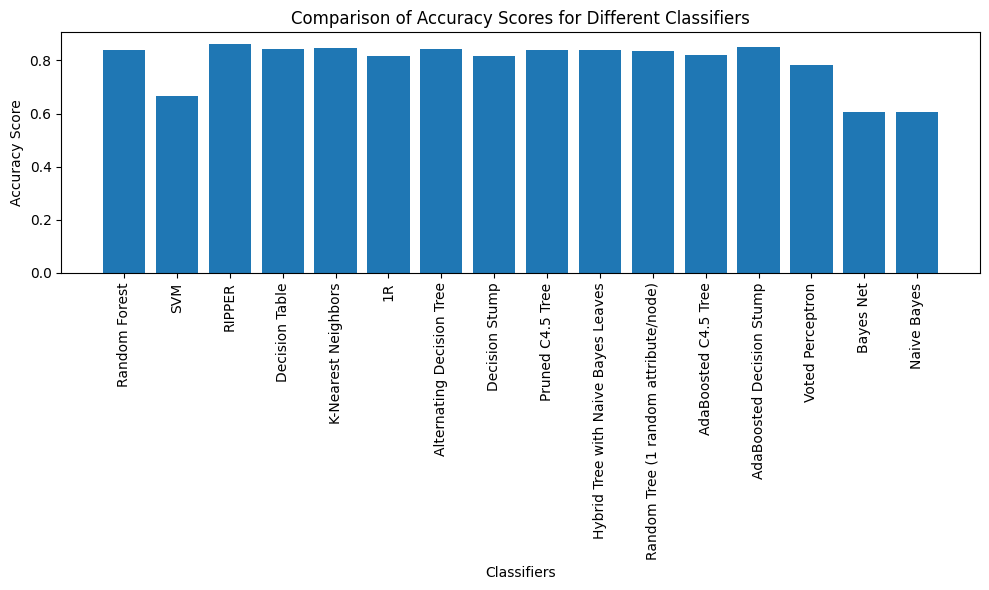

In [66]:
import matplotlib.pyplot as plt

# Plot the comparison between accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(classifiers)), accuracy_scores, align='center')
plt.xticks(range(len(classifiers)), [name for name, _ in classifiers], rotation=90)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores for Different Classifiers')
plt.tight_layout()
plt.show()
